In [6]:
import glob
import h5py as h5
import numpy as np
import os
import sys




from matplotlib import use
use('Agg')
from matplotlib import pyplot

%matplotlib inline

/home/mike/anaconda3/envs/pysac-27/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/mike/anaconda3/envs/pysac-27/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/mike/anaconda3/envs/pysac-27/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/mike/anaconda3/envs/pysac-27/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/mike/anaconda3/envs/pysac-27/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mike/anaconda

In [10]:
basedir='/mnt/xdrive/Users/cs1mkg/temp/' #For linux desktop remote mount to research data store
#basedir='/shared/sp2rc2/Users/cs1mkg/temp/' #For automounted research data storage from ShARC

files=sorted(glob.glob(basedir+'output-th85ph90/flds.tot*'))
prtfiles=sorted(glob.glob(basedir+'output-th85ph90/prtl.tot*'))
# go through the files
start=0
end=len(files)
interval=5
global d
d=[]

In [11]:
for filenum in range(start,end,interval):
    print "reading",files[filenum]
    f = h5.File(files[filenum],"r")
    f1 = h5.File(prtfiles[filenum],"r")
    dict={'bz':np.squeeze(f['bz']),'dens':np.squeeze(f['dens']),
          'pxi':np.squeeze(f1['ui']),'pyi':np.squeeze(f1['vi']),
          'pzi':np.squeeze(f1['wi']),'pxe':np.squeeze(f1['ue']),
          'pye':np.squeeze(f1['ve']),'pze':np.squeeze(f1['we']),
          'xi':np.squeeze(f1['xi']),'xe':np.squeeze(f1['xe'])}    
    d.append(dict)

reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.001
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.006
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.011
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.016
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.021
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.026
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.031
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.036
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.041
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.046
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.051
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.056
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.061
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot.066
reading /mnt/xdrive/Users/cs1mkg/temp/output-th85ph90/flds.tot

In [4]:
print len(dict['pxi'])

5034


In [12]:
print len(d)
de=d[39]
rho=de['dens']
bz=de['bz']
print np.shape(rho)

40
(130, 652)


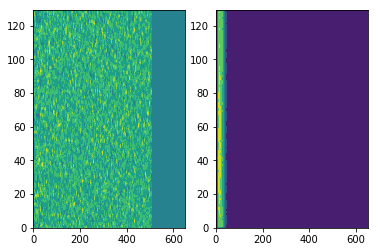

In [71]:
#
# Plot density field
#
fig1,ax1 = pyplot.subplots(1,2,num=1)

#ax1[0].imshow(rho)
#ax1[1].imshow(bz)

ax1[0].contourf(d[it]['bz'])
ax1[1].contourf(d[it]['dens'])

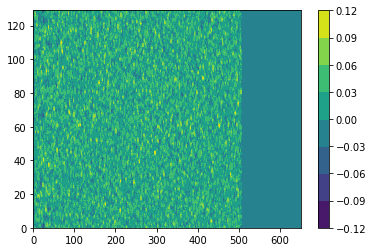

In [14]:
fig2, ax2 = pyplot.subplots()
itstep=1
it=20

cs = ax2.contourf(d[it]['bz'])
cbar = fig2.colorbar(cs)

pyplot.show()  

In [40]:
#compute average density over x-direction
rhoav=np.zeros([652])
dtemp=np.zeros([130])
it=39
dens=d[it]['dens']
for ix in range(0,651,1):
    for iy in range(0,129,1):
        dtemp[iy]=dens[iy][ix]    
    rhoav[ix]=np.mean(dtemp)

In [41]:
print(np.shape(dens))
#dtemp=dens[0][651]
print(np.shape(dtemp))
print(np.shape(rhoav))
print(rhoav)
print(rhoav[0],rhoav[651])

(130, 652)
(130,)
(652,)
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.35156194e+01   4.40367511e+01   7.83739637e+01   8.76483936e+01
   9.45037261e+01   9.84543520e+01   1.00328667e+02   1.00896107e+02
   9.98601195e+01   9.67732233e+01   9.29250317e+01   8.83460533e+01
   8.36416339e+01   7.88889632e+01   7.43964049e+01   6.92845910e+01
   6.42335307e+01   5.95815455e+01   5.54064017e+01   5.10339035e+01
   4.69773466e+01   4.29329551e+01   3.94143654e+01   3.58763349e+01
   3.24467134e+01   2.94400746e+01   2.66133530e+01   2.37124406e+01
   2.13591530e+01   1.88087164e+01   1.63540594e+01   1.43107505e+01
   1.24937301e+01   1.06240635e+01   8.91664993e+00   7.49969261e+00
   6.31490370e+00   5.16167682e+00   4.19231129e+00   3.37703037e+00
   2.68700264e+00   1.95318928e+00   1.35501151e+00   9.41861194e-01
   6.35026380e-01   3.88252628e-01   2.00433385e-01   9.69322258e-02
   4.2498

In [45]:
#compute mean density for each time step
itstep=1
it=20
rhot=np.zeros([40,652])
for it in range(0,39,itstep):
    dens=d[it]['dens']
    rhot[it]=dens[64][:]

In [43]:
#compute average density over y-direction for each time step
rhoavit=np.zeros([652,40])
dtemp=np.zeros([130])

for it in range(0,39,itstep):
    dens=d[it]['dens']
    for ix in range(0,651,1):
        for iy in range(0,129,1):
            dtemp[iy]=dens[iy][ix]    
        rhoavit[ix][it]=np.mean(dtemp)
        
        

In [50]:
print(np.shape(rhot))

(40, 652)


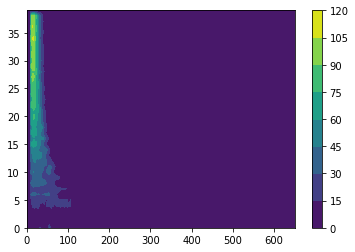

In [48]:
fig3, ax3 = pyplot.subplots()
itstep=1
it=20

cs = ax3.contourf(rhot)
cbar = fig3.colorbar(cs)

pyplot.show()  

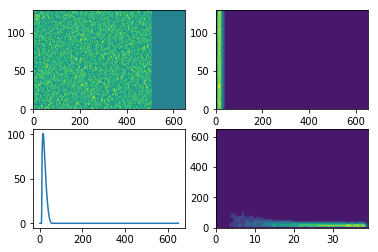

In [84]:
#
# Plot density field
#
it=39
fig4,ax4 = pyplot.subplots(2,2,num=1)

#ax1[0].imshow(rho)
#ax1[1].imshow(bz)

ax4[0][0].contourf(d[it]['bz'])
ax4[0][1].contourf(d[it]['dens'])
ax4[1][0].plot(rhoav)
ax4[1][1].contourf(rhoavit)